In [37]:
# Marlair Aline 33561800

In [38]:
#import
from pymatgen import Structure
from matplotlib import pyplot as plt
from pymatgen.ext.matproj import MPRester
from pymatgen.io.cif import CifWriter
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure import bandstructure as bs
from IPython.display import Image
import numpy as np

In [39]:
#Téléchargement  de la structure de bande
with MPRester("VGzmabHyhs7K1L84") as m:

    structure = m.get_bandstructure_by_material_id("mp-7017")



Détails de la bande interdite : 

Energie de la bande interdite :  0.8272000000000004 eV 

Est ce que'il s'agit d'une bande interdite direct ? False 

Nous sommes donc en présence d'une bande interdite indirect avec une énergie EG = 0.8272 eV. En effet, nous pouvons voir sur le graphe ci-dessous que le minimum de la bande de conduction ne correspond pas au maximum de la bande de valence. De plus, comme l'énergie est inférieur à 2 eV, il s'agit d'un semi-conducteur.
Diagramme de la structure de bande:


<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

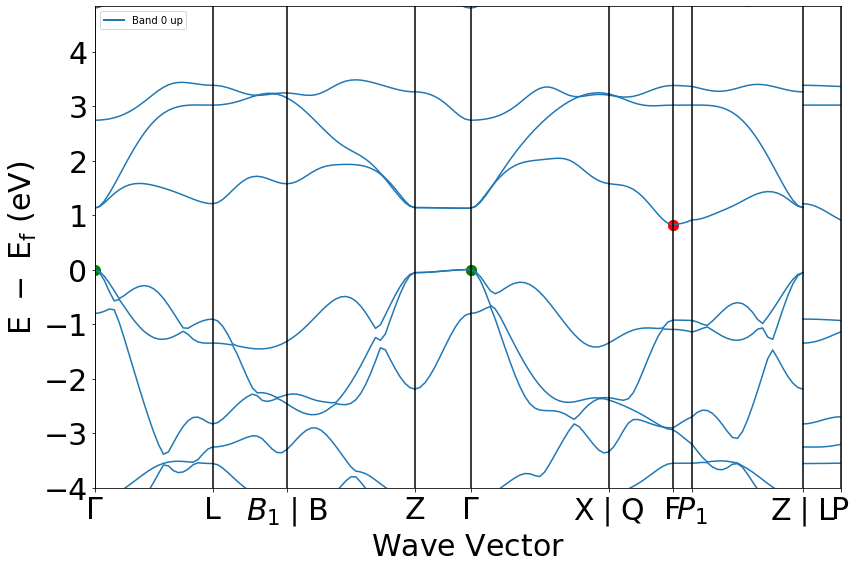

In [40]:
#Obtention de la bande interdite

bandgap =  structure.get_band_gap()
bplot = plotter.BSPlotter(structure)
print ("Détails de la bande interdite : \n")
print("Energie de la bande interdite : ",bandgap.get('energy'),"eV \n")
print("Est ce que'il s'agit d'une bande interdite direct ?", bandgap.get('direct'),"\n")

print("Nous sommes donc en présence d'une bande interdite indirect avec une énergie EG = 0.8272 eV. En effet, nous pouvons voir sur le graphe ci-dessous que le minimum de la bande de conduction ne correspond pas au maximum de la bande de valence. De plus, comme l'énergie est inférieur à 2 eV, il s'agit d'un semi-conducteur.")
print("Diagramme de la structure de bande:")
bplot.get_plot(vbm_cbm_marker=True)

In [41]:
#Récupération des données utiles pour les dispersions
data = bplot.bs_plot_data()

distance = data.get('ticks').get('distance')
Energie = data.get('energy')

In [42]:
print('\n',structure.get_vbm()['band_index'])
print('\n',structure.get_cbm()['band_index'])


 defaultdict(<class 'list'>, {<Spin.up: 1>: [12, 13]})

 defaultdict(<class 'list'>, {<Spin.up: 1>: [14]})


In [43]:
#Distance entre chaque branche différente
dist = []
for i in range(len(distance)-1):
    d = distance[i+1]-distance[i]
    if ((d) != 0):
        dist.append(d)
        
# Différence d'énergie entre chaque branche  pour la dernière bande de valence      
deltaval = []
for i in range(len(dist)):
    deltaval.append((Energie.get('1')[i][13][0])- (Energie.get('1')[i][13][-1]))

# Pente entre chaque branche  pour la dernière bande de valence          
pentval = []
pentvalabs = []
for i in range(len(dist)):
    pentvalabs.append(abs(deltaval[i]/dist[i]))
    pentval.append(deltaval[i]/dist[i])

    
maxdispval =  max(pentvalabs)
mindispval =  min(pentvalabs)
print("La pente donne une indication sur la dispersion, au plus elle est grande, au plus la bande présentera de dispertion et inversement.\n")
print("La plus grande pente de la dernière bande de valence est ",maxdispval,"Ceci correspond à la direction Γ/X|Q , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche verte)\n")
    
print("La plus petite pente de la dernière bande de valence est ",mindispval,"Ceci correspond à la direction F/P1 , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche bleue)\n")
    

La pente donne une indication sur la dispersion, au plus elle est grande, au plus la bande présentera de dispertion et inversement.

La plus grande pente de la dernière bande de valence est  0.9988702969785717 Ceci correspond à la direction Γ/X|Q , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche verte)

La plus petite pente de la dernière bande de valence est  0.033823282175942194 Ceci correspond à la direction F/P1 , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche bleue)



In [44]:
# Différence d'énergie entre chaque branche  pour la première bande de conduction
deltacond = []
for i in range(len(dist)):
    deltacond.append((Energie.get('1')[i][14][0])- (Energie.get('1')[i][14][-1]))
    

# Pente entre chaque branche  pour la première bande de conduction   
pentcond = []
pentcondabs = []
for i in range(len(dist)):
    pentcondabs.append(abs(deltacond[i]/dist[i]))
    pentcond.append(deltacond[i]/dist[i])
       
maxdispcond =  max(pentcondabs)
mindispcond =  min(pentcondabs)


print("La pente donne une indication sur la dispersion, au plus elle est grande, au plus la bande présentera de dispertion et inversement.\n")
print("La plus grande pente de la première bande de conduction est ",maxdispcond,"Ceci correspond à la direction X|Q/F , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche rouge)\n")
    
print("La plus petite pente de la première bande de conduction est ",mindispcond,"Ceci correspond à la direction Z/Γ , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche noire)\n")
    

La pente donne une indication sur la dispersion, au plus elle est grande, au plus la bande présentera de dispertion et inversement.

La plus grande pente de la première bande de conduction est  1.1864455678433716 Ceci correspond à la direction X|Q/F , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche rouge)

La plus petite pente de la première bande de conduction est  0.02165981882146716 Ceci correspond à la direction Z/Γ , nous pouvons le vérifier sur le graphe disponible plus bas (Flèche noire)



[1.1660140407988762, 0.7321041033244924, 1.2624261666548002, 0.5494044109088136, 1.363317166706595, 0.6312131127610785, 0.19217531776451047, 1.0932931367625756, 0.3708725087465803]


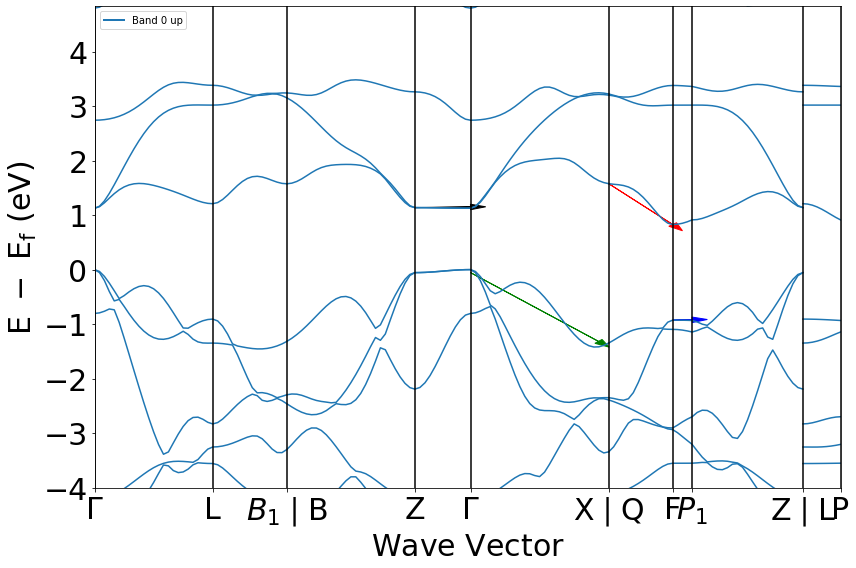

In [45]:
bplot.get_plot()

# Flèche représentant la direction pour laquelle la bande de valence présente le plus de dispersion 
FlechePlusDispVal = plt.arrow(distance[6], (Energie.get('1')[3][13])[0], dist[2], deltaval[2], color = 'g', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de valence présente le moins de dispersion 
FlecheMoinsDispVal = plt.arrow(distance[9], (Energie.get('1')[6][13])[0], dist[6], deltaval[6], color = 'b', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de conduction présente le plus de dispersion 
FlechePlusDispCond = plt.arrow(distance[8], (Energie.get('1')[5][14])[0], dist[5], -deltacond[5], color = 'r', head_width = 0.1)

# Flèche représentant la direction pour laquelle la bande de conduction présente le moins de dispersion 
FlecheMoinsDispCond = plt.arrow(distance[5], (Energie.get('1')[3][14])[0], dist[3], deltacond[3], color = 'k', head_width = 0.1)

print(dist)

In [46]:
#Calcul des masses effective 
h = 6.58212e-16 #Constante de Planck

# Masse effective pour le maximum de la bande de valence
vbm =  structure.get_vbm()
ev = vbm['energy']
kv = vbm['kpoint'].cart_coords

mv = (h**2)/(2*ev)*(kv[0]**2+kv[1]**2+kv[2]**2)

print("La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut :", mv, '[kg]')

# Masse effective pour le minimum de la bande de conduction
cbm =  structure.get_cbm()
ec = cbm['energy']
kc = cbm['kpoint'].cart_coords

mc = (h**2)/(2*ec)*(kc[0]**2+kc[1]**2+kc[2]**2)

print("La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut :", mc, '[kg]')


La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut : 0.0 [kg]
La masse effective à la base de la bande de conduction  en supposant une dispersion parabolique vaut : 6.821323166273683e-32 [kg]
